In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [4]:
company=pd.read_csv(r'C:\Users\poorn\OneDrive\Documents\ExcelR\Asssignment\Assign_15_Random Forest\Company_Data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
# Checking for null values
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
# Checking the information about Data Frame
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [11]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [13]:
#convert target variable to categorical variable
company["Sales"] = np.where(company['Sales']>=5,'Yes','No') 

In [17]:
company.Sales.unique()

array(['Yes', 'No'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label = LabelEncoder()

In [21]:
company['Sales']= label.fit_transform(company['Sales']) 
company['ShelveLoc']= label.fit_transform(company['ShelveLoc']) 
company['Urban']= label.fit_transform(company['Urban'])
company['US']= label.fit_transform(company['US'])

In [22]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


### Visualization

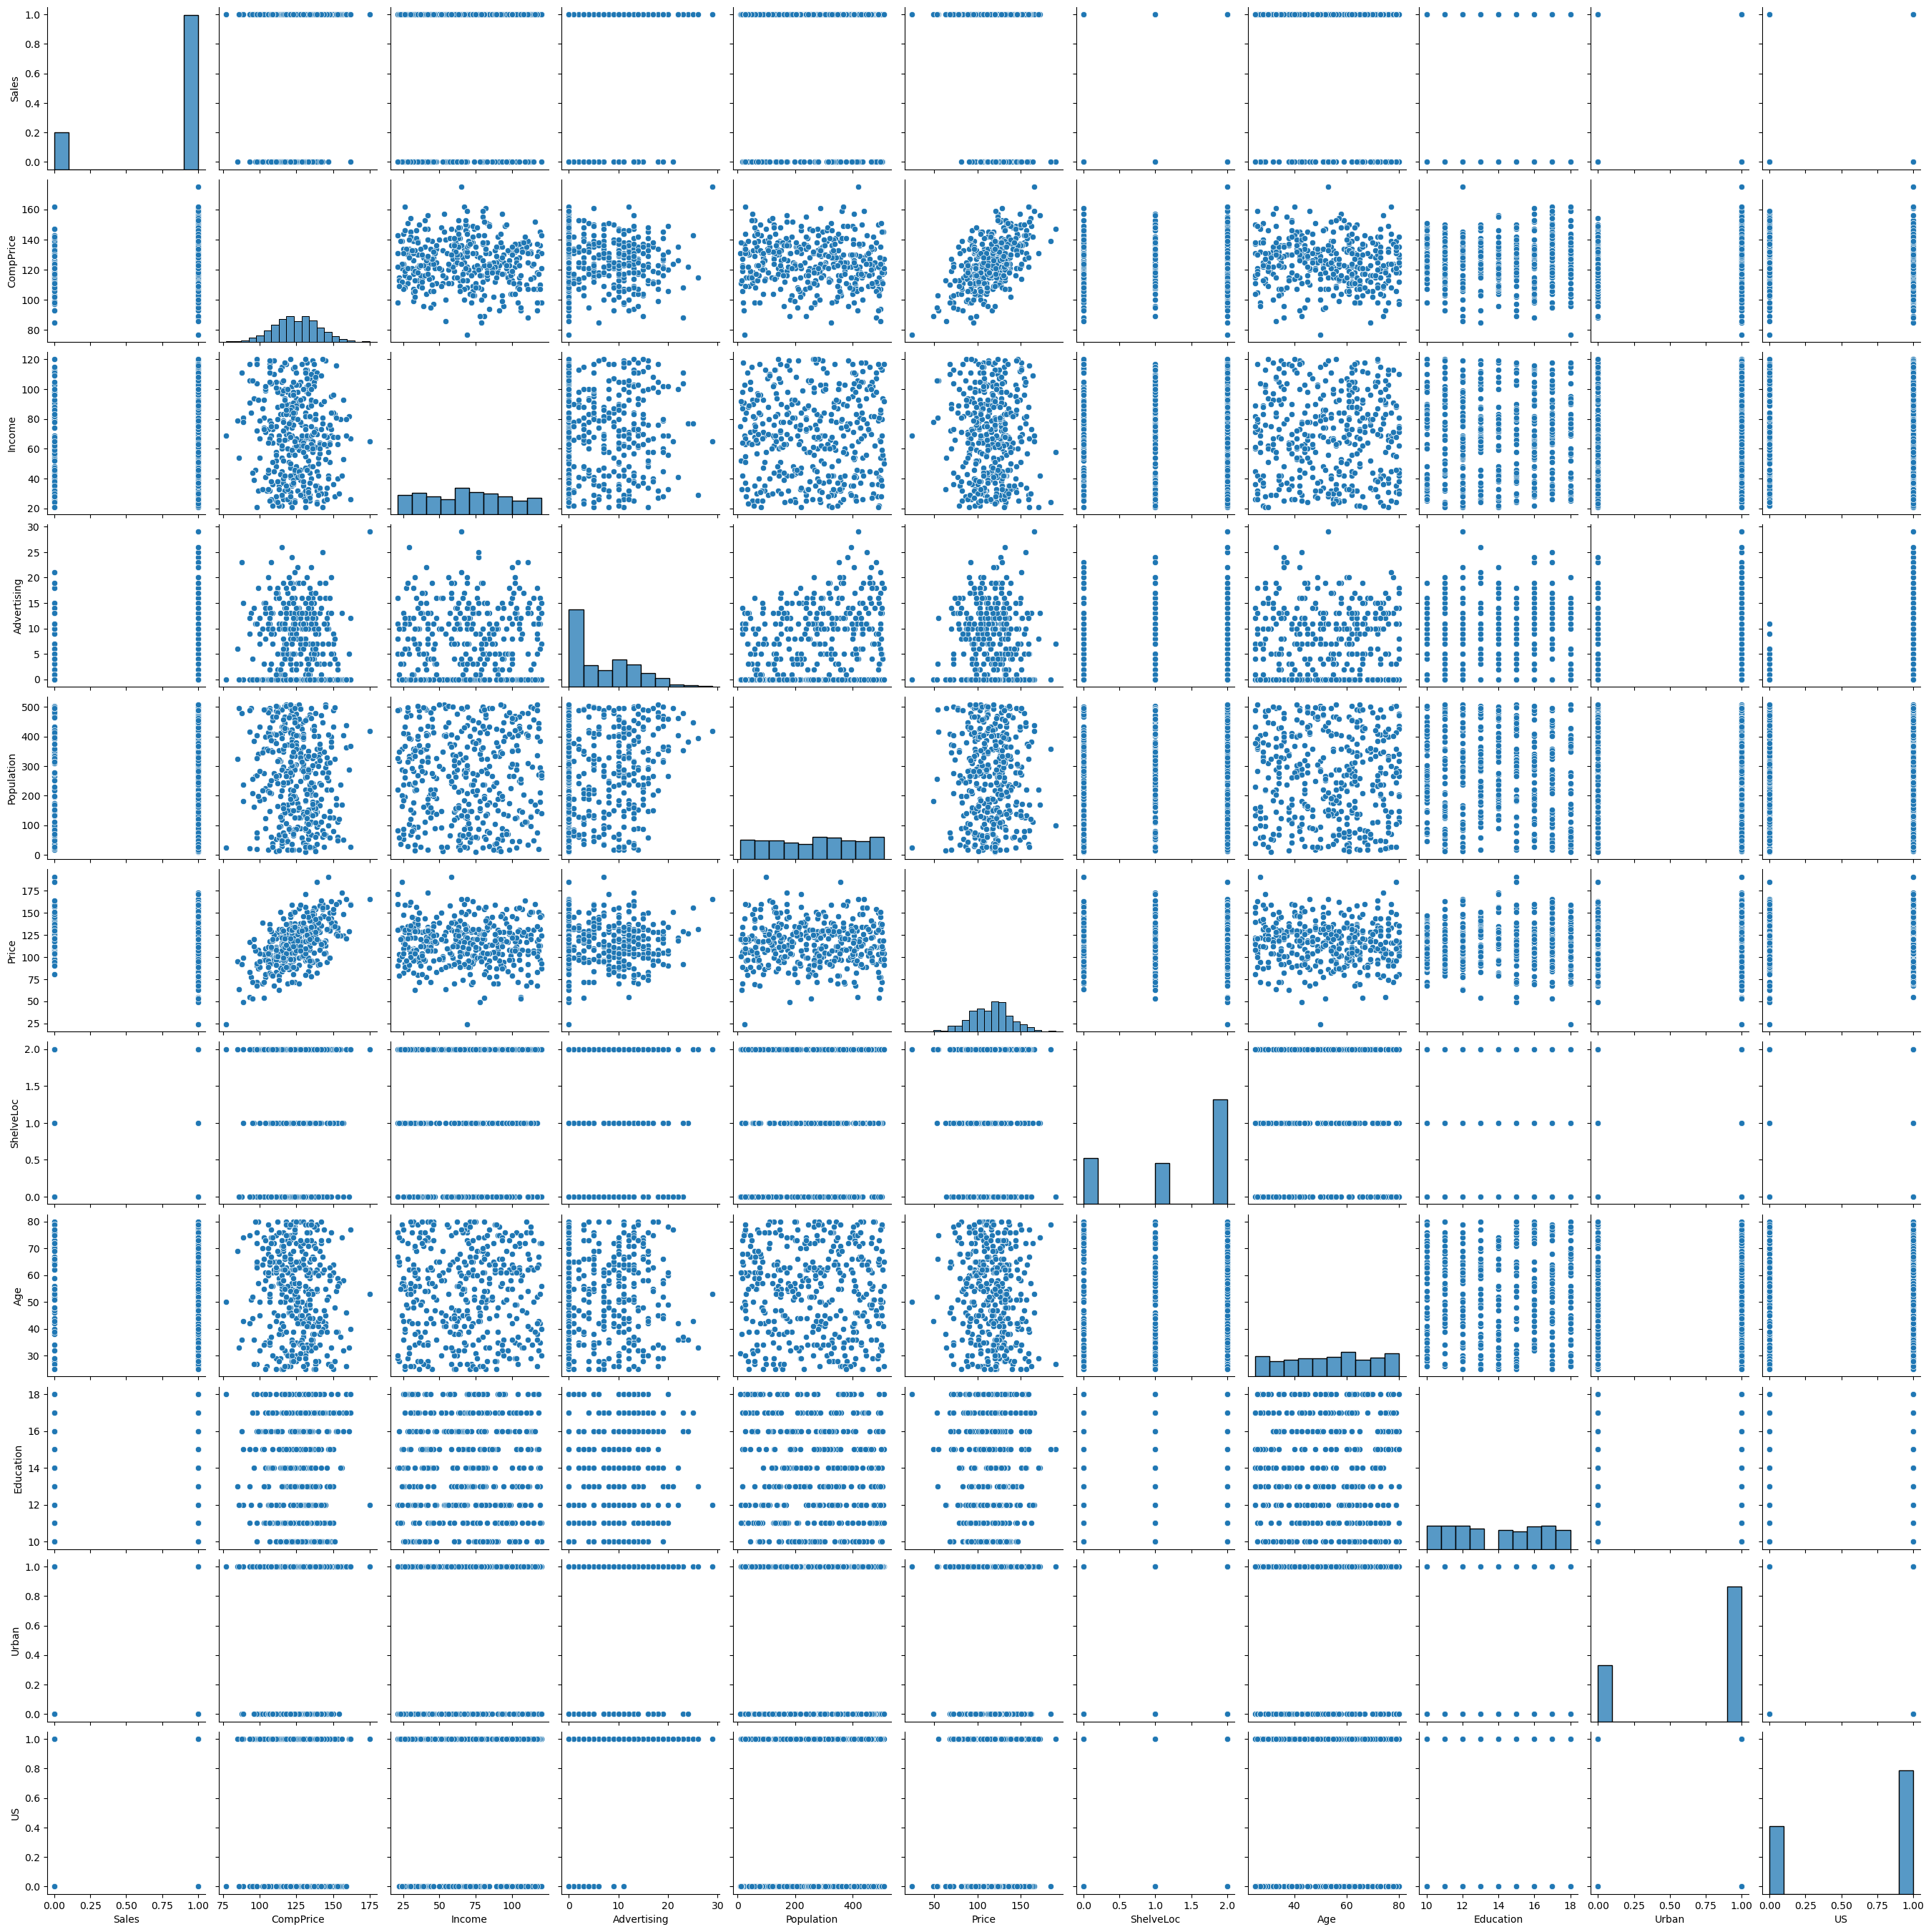

In [23]:
# Pair Plot
sns.pairplot(company)

<Axes: xlabel='ShelveLoc', ylabel='Density'>

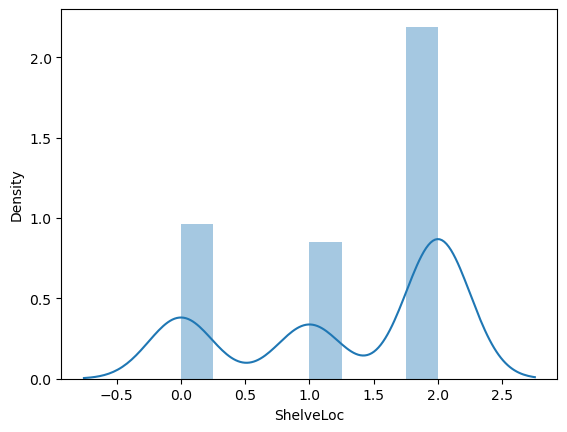

In [25]:
# Distplot of Taxable Income
sns.distplot(company['ShelveLoc'])

<Axes: >

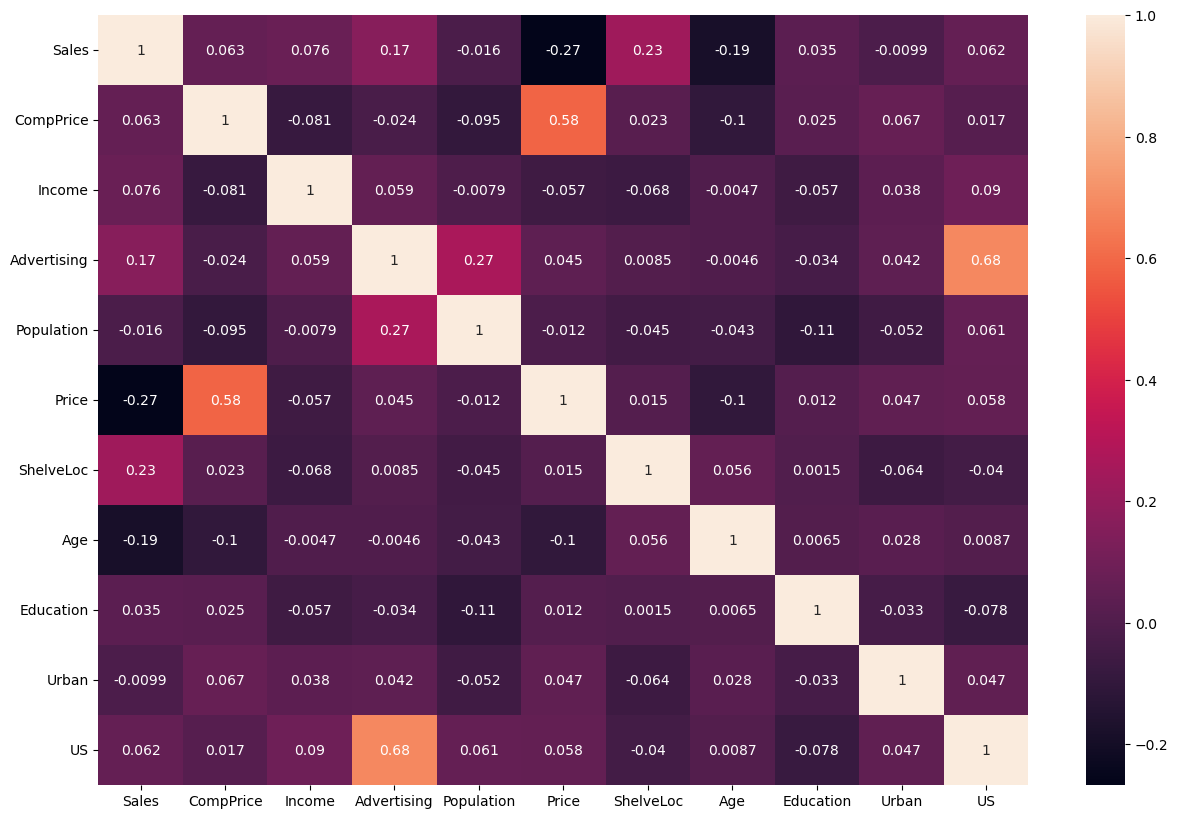

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(company.corr(), annot = True)

In [29]:
#Splitting
X = company.iloc[:,1 :]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [31]:
Y = company.iloc[:,0]
Y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Sales, Length: 400, dtype: int32

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


### Random Forest Classification

In [36]:
num_trees = 82
max_features = 4

In [37]:
kfold = KFold(n_splits=8, random_state=27, shuffle=True)
model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [41]:
model2.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=82)

In [44]:
results = cross_val_score(model2, X,Y, cv=kfold)
print("The Accuracy is ",results.mean())

The Accuracy is  0.8400000000000001


### Random Forest Regression

In [45]:
num_trees = 70
max_features = 5

In [46]:
kfold = KFold(n_splits=7, random_state=34, shuffle=True)
model3 = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)

In [48]:
results = cross_val_score(model3, X, Y, cv=kfold)
print("The Accuracy is ",results.mean())

The Accuracy is  0.2378027471352608


Hyperparameter Tuning - Randomized Search Cross Validation

In [49]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [50]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [51]:
# Random search of parameters
rf_random = RandomizedSearchCV(estimator=model2, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                               random_state=42, n_jobs=-1)

In [52]:
# Fit the random search model
rf_random.fit(X_train, y_train)
print("Best parameters from RandomizedSearchCV:", rf_random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters from RandomizedSearchCV: {'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


Hyperparameter Tuning - Grid Search Cross Validation

In [53]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [54]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# Fit the grid search model
grid_search.fit(X_train, y_train)
print("Best parameters from GridSearchCV:", grid_search.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters from GridSearchCV: {'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [55]:
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, accuracy_score

In [56]:
# Final Model with Best Parameters
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)
print("Accuracy after hyperparameter tuning:", accuracy_score(y_test, y_pred_final))

Accuracy after hyperparameter tuning: 0.8625


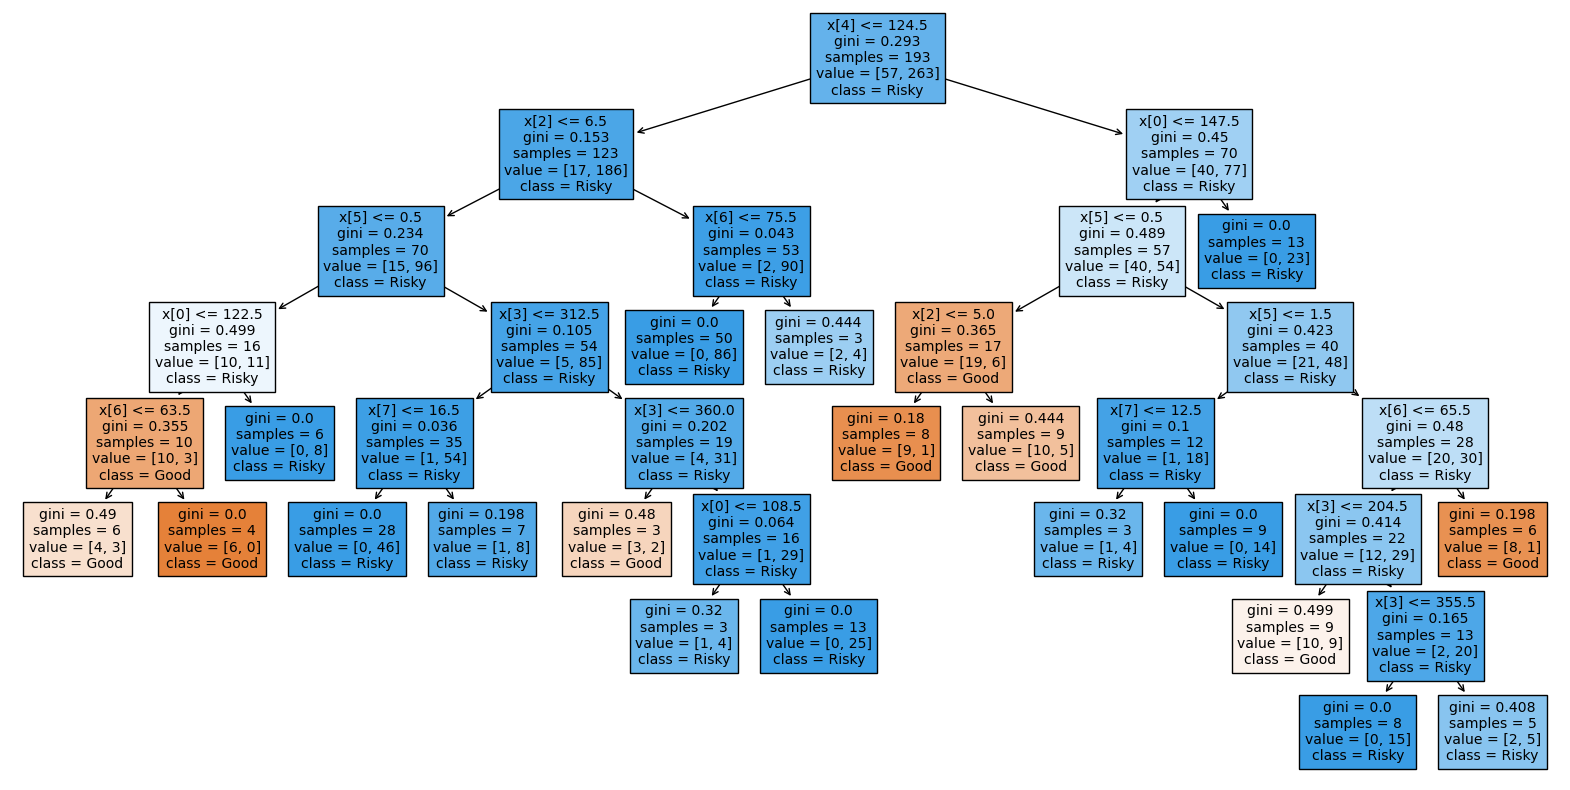

In [57]:
# Visualizing a tree
plt.figure(figsize=(20,10))
plot_tree(final_model.estimators_[0], filled=True, class_names=['Good', 'Risky'])
plt.show()